**Corrélations entre les variables pour des données brutes**

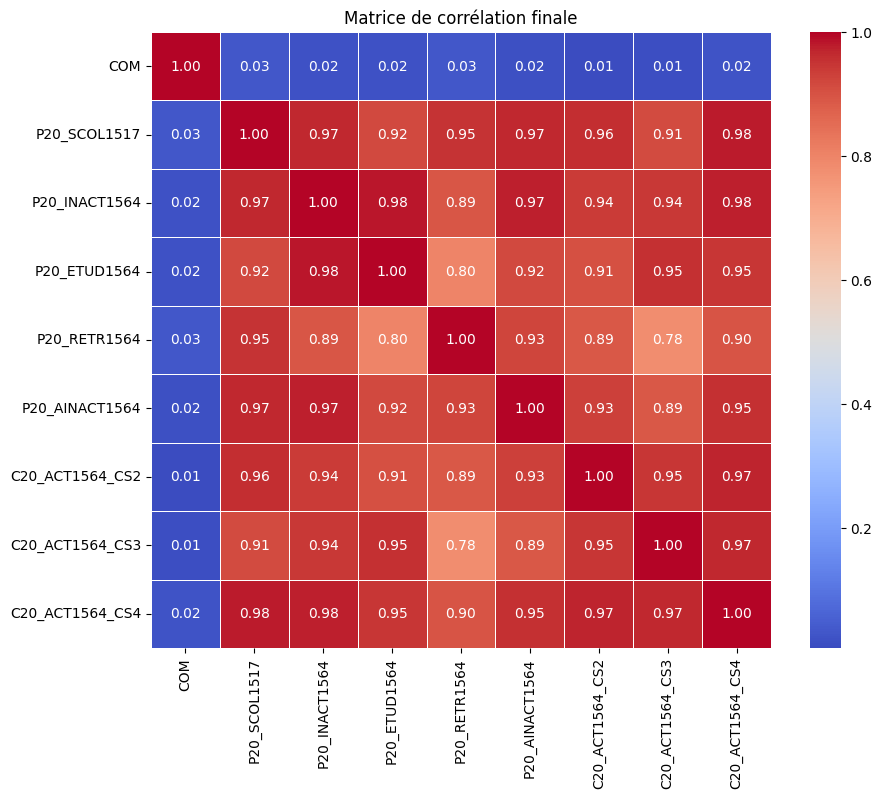

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier Excel dans un DataFrame Pandas
data0 = pd.read_excel("Table1.xlsx")
data=data0.drop('N TL',axis=1)
# Exclure les colonnes de type objet (texte)
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.99).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.5].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()

# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


**Corrélations entre les variables pour des données 'proportion'**

In [3]:
#Construction de mes données

data=pd.read_csv('votre_fichier_normalise.csv',index_col=0)
data=data.drop('P20_POP1564',axis=1)
columns_to_update = [col for col in data.columns if col.startswith('ETTEF')]
for col in columns_to_update:
    data = data.drop(col, axis=1)
data0 = data0.reset_index(drop=True)
data = data.reset_index(drop=True)
data['P20_POP1564']=data0['P20_POP1564']
for col in columns_to_update:
    data[col] = data0[col]
#data=data.drop('N TL',axis=1)
#test2=pd.read_excel('test2.xlsx',index_col=0)
#data['NTLBIN']=test2['NTLBIN']

# Exclure les colonnes de type objet (texte)
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['N TL']
print(correlations)

   

N TL                   1.000000
P20_SCOL1517          -0.026985
P20_SCOL1824           0.259930
P20_SCOL2529           0.188823
P20_NSCOL15P_CAPBEP   -0.127044
P20_NSCOL15P_BAC      -0.059272
P20_NSCOL15P_SUP2     -0.014620
P20_NSCOL15P_SUP34     0.050222
P20_NSCOL15P_SUP5      0.137498
P20_ACT1564           -0.053511
P20_ACTOCC1564        -0.075545
P20_CHOMEUR1564        0.065208
P20_CHOM_DIPLMIN       0.043633
P20_CHOM_SUP34         0.059092
P20_CHOM_SUP5          0.078652
P20_ACT_DIPLMIN        0.001313
P20_ACT_SUP34          0.071024
P20_ACT_SUP5           0.169649
P20_INACT1564          0.053511
P20_ETUD1564           0.154200
P20_RETR1564          -0.074499
P20_AINACT1564         0.037998
C20_ACT1564_CS2       -0.024093
C20_ACT1564_CS3        0.076349
C20_ACT1564_CS4        0.015827
P20_POP1564            0.852859
ETTEF2021              0.822653
ETTEF5021              0.799136
ETTEF1021              0.854399
ETTEF121               0.882377
ETTEF021               0.876132
Name: N 

In [4]:
threshold = 0.05  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à 0.05 :
N TL                   1.000000
P20_SCOL1824           0.259930
P20_SCOL2529           0.188823
P20_NSCOL15P_CAPBEP   -0.127044
P20_NSCOL15P_BAC      -0.059272
P20_NSCOL15P_SUP34     0.050222
P20_NSCOL15P_SUP5      0.137498
P20_ACT1564           -0.053511
P20_ACTOCC1564        -0.075545
P20_CHOMEUR1564        0.065208
P20_CHOM_SUP34         0.059092
P20_CHOM_SUP5          0.078652
P20_ACT_SUP34          0.071024
P20_ACT_SUP5           0.169649
P20_INACT1564          0.053511
P20_ETUD1564           0.154200
P20_RETR1564          -0.074499
C20_ACT1564_CS3        0.076349
P20_POP1564            0.852859
ETTEF2021              0.822653
ETTEF5021              0.799136
ETTEF1021              0.854399
ETTEF121               0.882377
ETTEF021               0.876132
Name: N TL, dtype: float64


In [5]:
#test2=pd.read_excel('test2.xlsx',index_col=0)
#data['NTLBIN']=test2['NTLBIN']
data.to_csv('donnéesfinales.csv',index=False)